In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def linear(x,a,b):
    return a*x + b

In [3]:
V_t0=100

V_ag=np.array([0,2,4,6,8,10,12,13,13.5,14,14.5,15,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8,15.9,16.0,16.1,16.2,16.3,16.4,16.5,16.6,16.7,16.8,16.9,17,17.2,17.4,17.6,17.8,18,18.5,19,20,21,22,23,24,25])
poten=np.array([160,162,166,171,177,184,194,200,205,210,215,223,225,226,228,230,233,234,238,241,246,252,256,263,271,307,329,385,401,412,420,428,434,440,445,450,455,461,465,472,479,483,486,489,491])
condu=np.array([3.95,3.87,3.80,3.72,3.66,3.59,3.52,3.49,3.48,3.45,3.43,3.43,3.42,3.42,3.41,3.41,3.39,3.39,3.39,3.39,3.38,3.37,3.37,3.37,3.37,3.36,3.36,3.36,3.39,3.39,3.4,3.4,3.41,3.42,3.44,3.46,3.46,3.49,3.51,3.58,3.64,3.69,3.73,3.78,3.83])
#print(len(V_ag),len(poten),len(condu))
#print(V_ag[max_index+1],poten[max_index+1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


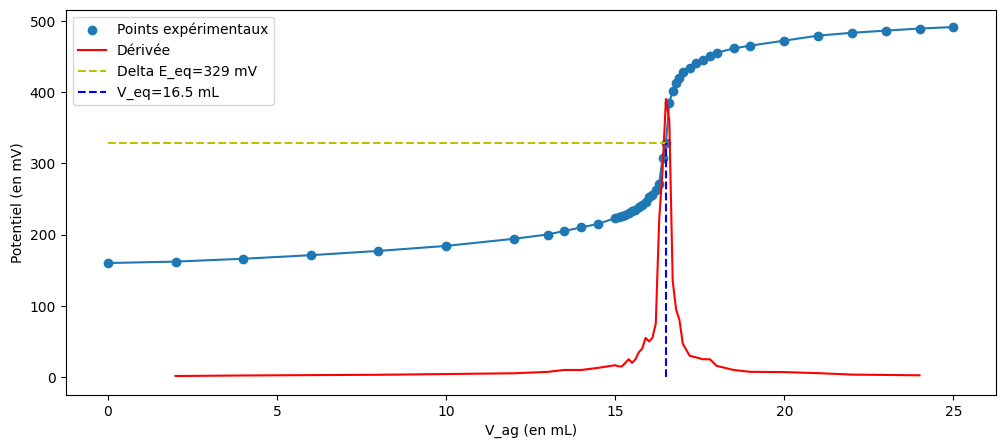

In [14]:
fig=plt.figure(figsize=[12,5])
V_der=[]
poten_der=[]

for i in range(1,len(V_ag)-1):
    V_der.append(V_ag[i])
    poten_der.append((poten[i+1]-poten[i-1])/(V_ag[i+1]-V_ag[i-1]))

max_index=poten_der.index(np.max(poten_der))
Veq1=V_der[max_index]

plt.scatter(V_ag,poten,label='Points expérimentaux')
plt.plot(V_ag,poten)
plt.plot(V_der,poten_der,c='r',label=f'Dérivée')

#plt.hlines(poten[max_index+2],0,V_ag[max_index+2],label=f'Delta E_eq_max={poten[max_index+2]} mV',ls='--',colors='g')
plt.hlines(poten[max_index+1],0,V_ag[max_index+1],label=f'Delta E_eq={poten[max_index+1]} mV',ls='--',colors='y')

plt.vlines(Veq1,0,poten[max_index+1],ls='--',label=f'V_eq={Veq1} mL',colors='b')

plt.legend()
plt.xlabel('V_ag (en mL)')
plt.ylabel('Potentiel (en mV)')
plt.savefig('Potentiel.eps',format='eps',dpi=500,bbox_inches='tight')
plt.show()

In [5]:
print(poten[max_index+1])
print(V_ag[max_index+1])

329
16.5


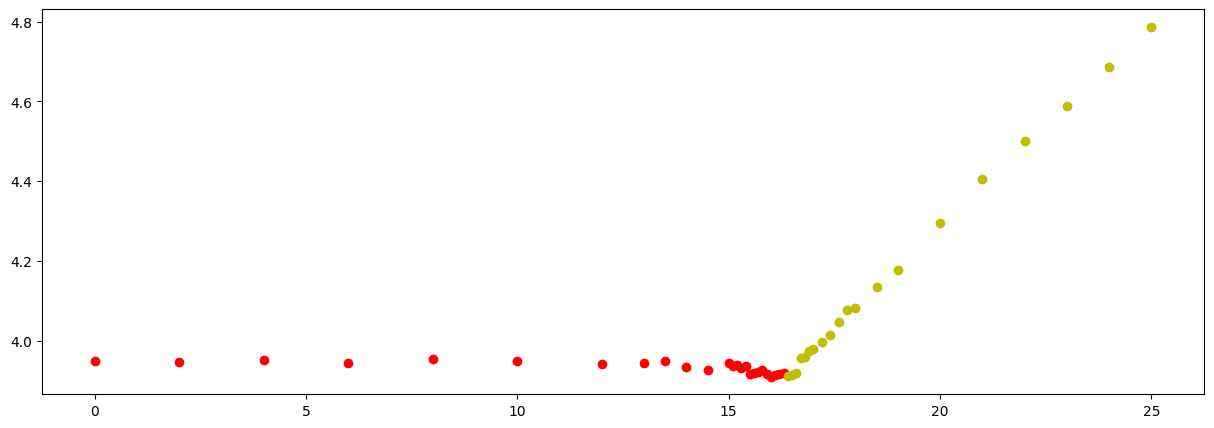

In [6]:
fig=plt.figure(figsize=[15,5])

conduprime=condu*(V_t0+V_ag)/V_t0

nbre= max_index  #points avants eq

Vavant=V_ag[:nbre]
conduavant=conduprime[:nbre]

plt.scatter(Vavant,conduavant,c='r')

Vapres=V_ag[nbre:]
conduapres=conduprime[nbre:]

plt.scatter(Vapres,conduapres,c='y')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


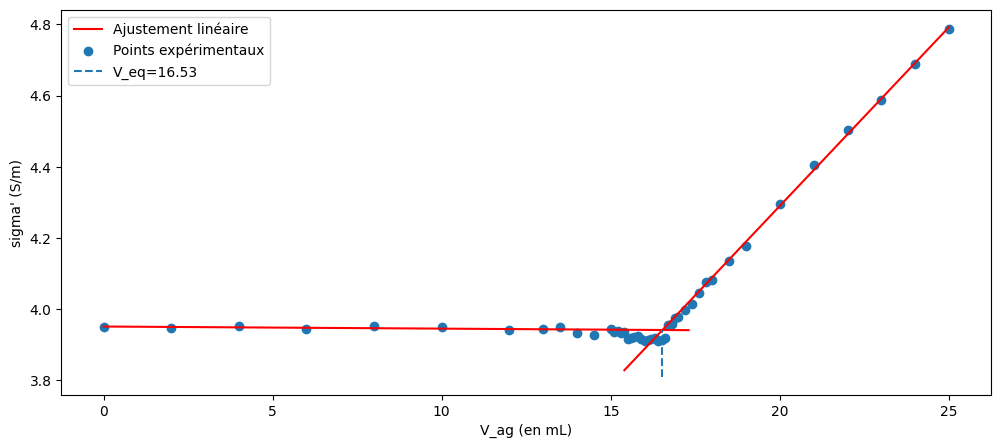

In [15]:
fig=plt.figure(figsize=[12,5])
[avant,bavant] , cov = curve_fit(linear,xdata=Vavant[:10],ydata=conduavant[:10])
listeVavant=np.linspace(Vavant[0],Vavant[-1]+1,200)
plt.plot(listeVavant,linear(listeVavant,avant,bavant),c='r',label='Ajustement linéaire')

[apres,bapres], cov = curve_fit(linear,xdata=Vapres[10:],ydata=conduapres[10:])
listeVapres=np.linspace(Vapres[0]-1,Vapres[-1],200)
plt.plot(listeVapres,linear(listeVapres,apres,bapres),c='r')

plt.scatter(V_ag,conduprime,label="Points expérimentaux")

Veq=(bapres-bavant)/(avant-apres)
plt.vlines(Veq,min(conduprime)-0.1,linear(Veq,avant,bavant),ls='--',label=f"V_eq={round(Veq,2)}")

plt.legend()
plt.xlabel("V_ag (en mL)")
plt.ylabel("sigma\' (S/m)")
plt.savefig("Conducti.eps",format='eps',dpi=500,bbox_inches='tight')
plt.show()

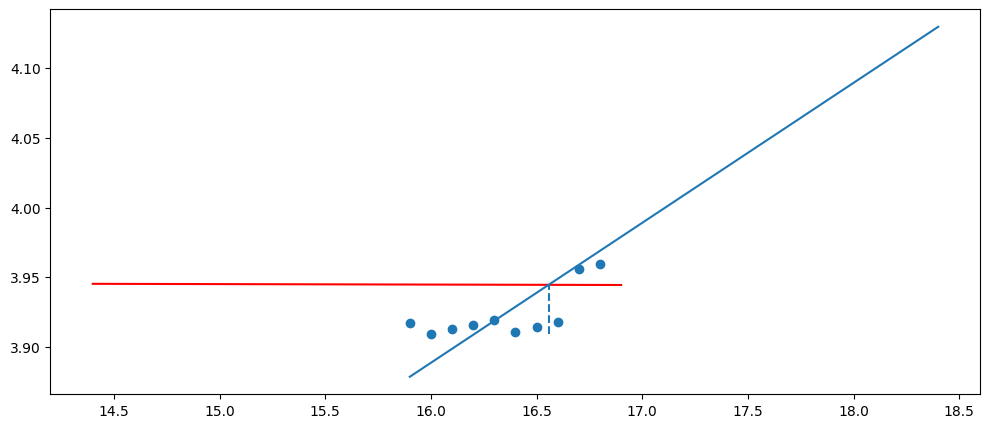

In [8]:
fig=plt.figure(figsize=[12,5])
Vzoom=V_ag[nbre-5:nbre+5]
condu_zoom=conduprime[nbre-5:nbre+5]

plt.scatter(Vzoom,condu_zoom)

Vza=np.linspace(V_ag[nbre]-2,V_ag[nbre]+0.5)
Vzap=np.linspace(V_ag[nbre]-0.5,V_ag[nbre]+2)

plt.plot(Vza,linear(Vza,avant,bavant),c='r')
plt.plot(Vzap,linear(Vzap,apres,bapres))

plt.vlines(Veq,min(conduprime),linear(Veq,avant,bavant),ls='--',label=f"V_eq={round(Veq,3)}")

plt.show()

39
15.065304333751996


<Figure size 1200x500 with 0 Axes>

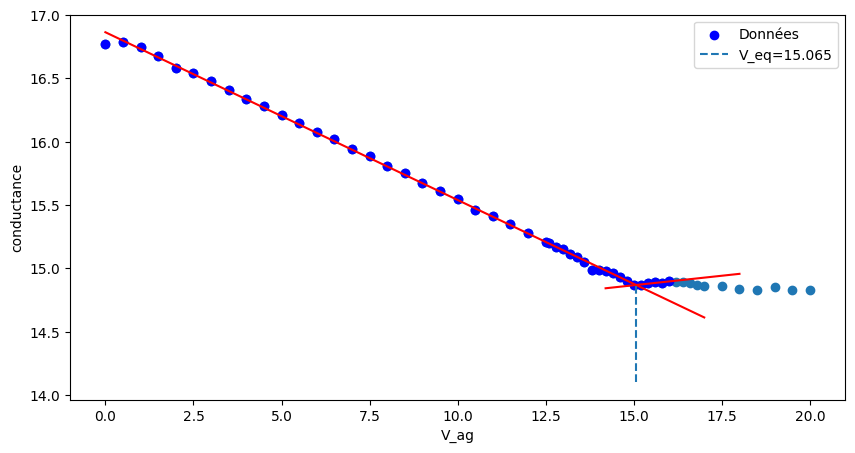

In [9]:
fig=plt.figure(figsize=[12,5])
#incertitudes_sigma=
#incertitudes_volumes=

fig=plt.figure(figsize=[10,5])
V_titrage=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 12.6, 12.8, 13, 13.2, 13.4, 13.6, 13.8, 14, 14.2, 14.4, 14.6, 14.8, 15, 15.2, 15.4, 15.6, 15.8, 16, 16.2, 16.4, 16.6, 16.8, 17, 17.5, 18, 18.5, 19, 19.5, 20])
conductance=np.array([16.77, 16.79, 16.75, 16.68, 16.58, 16.54, 16.48, 16.41, 16.34, 16.28, 16.21, 16.15, 16.08, 16.02, 15.94, 15.89, 15.81, 15.75, 15.67, 15.61, 15.55, 15.46, 15.41, 15.35, 15.28, 15.21,15.2, 15.17, 15.15, 15.11, 15.09, 15.05, 14.99, 14.99, 14.98, 14.96, 14.93, 14.9, 14.87, 14.87, 14.88, 14.89,14.88, 14.9, 14.89, 14.89, 14.88, 14.87, 14.86, 14.86, 14.84, 14.83, 14.85, 14.83, 14.83]) #grandeur mesuré pour le titrage 
plt.scatter(V_titrage,conductance) #On trace tous les points

V_ag_avanteq=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 12.6, 12.8, 13, 13.2, 13.4, 13.6, 13.8, 14, 14.2, 14.4, 14.6, 14.8,15])
sigma_avanteq=np.array([16.77, 16.79, 16.75, 16.68, 16.58, 16.54, 16.48, 16.41, 16.34, 16.28, 16.21, 16.15, 16.08, 16.02, 15.94, 15.89, 15.81, 15.75, 15.67, 15.61, 15.55, 15.46, 15.41, 15.35, 15.28, 15.21,15.2, 15.17, 15.15, 15.11, 15.09, 15.05, 14.99, 14.99, 14.98, 14.96, 14.93, 14.9, 14.87])
print(len(V_ag_avanteq))

V_ag_apres=np.array([15.2, 15.4, 15.6, 15.8, 16])
sigma_apres=np.array([ 14.87, 14.88, 14.89,14.88, 14.9])

param,pcov = curve_fit(linear,xdata=V_ag_avanteq,ydata=sigma_avanteq)
(a,b)=(param[0],param[1])

V_liste=np.linspace(V_ag_avanteq[0],V_ag_avanteq[-1]+2)
plt.scatter(V_ag_avanteq,sigma_avanteq,label='Données',c='b')
plt.plot(V_liste,linear(V_liste,a,b),c='r')


param2,pcov2=curve_fit(linear,xdata=V_ag_apres,ydata=sigma_apres)
(a2,b2)=(param2[0],param2[1])



Vprime=np.linspace(V_ag_apres[0]-1,V_ag_apres[-1]+2)
plt.scatter(V_ag_apres,sigma_apres,c='b')
plt.plot(Vprime,linear(Vprime,a2,b2),c='r')

V_eq=(b2-b)/(a-a2)
print(V_eq)
plt.vlines(V_eq,14.1,linear(V_eq,a,b),linestyles='--',label=f"V_eq={round(V_eq,3)}")


plt.xlabel('V_ag')
plt.ylabel('conductance')
plt.legend()
plt.show()


[13.  13.2 13.4 13.6 13.8 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6
 15.8]


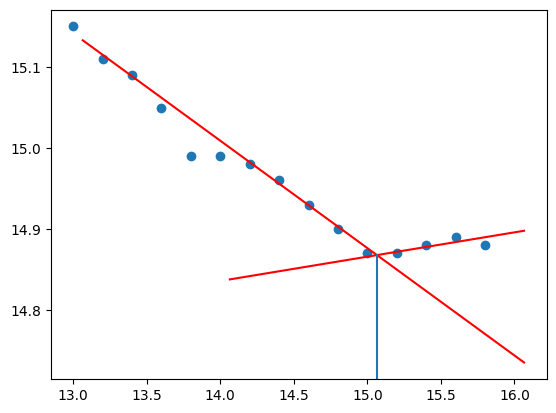

In [10]:
V_zoom=np.array([V_titrage[i] for i in range(28,43)])
sigma_zoom=np.array([conductance[i] for i in range(28,43)])
print(V_zoom)
plt.scatter(V_zoom,sigma_zoom)
V_fon=np.linspace(V_eq-2,V_eq+1)
plt.plot(V_fon,linear(V_fon,a,b),c='r')

V_fonprime=np.linspace(V_eq-1,V_eq+1)
plt.plot(V_fonprime,linear(V_fonprime,a2,b2),c='r')
plt.axvline(V_eq,ymin=0,ymax=0.335,label=f"V_eq={round(V_eq,3)}")



plt.show()

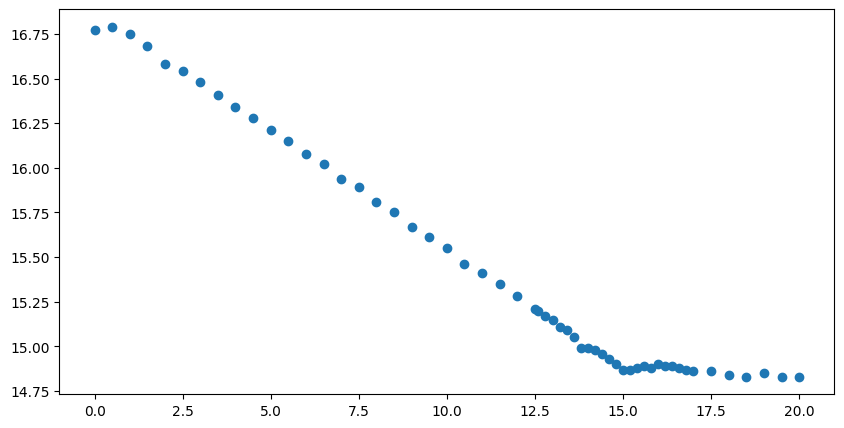

55
38 38


In [11]:
fig=plt.figure(figsize=[10,5])
V_titrage=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 12.6, 12.8, 13, 13.2, 13.4, 13.6, 13.8, 14, 14.2, 14.4, 14.6, 14.8, 15, 15.2, 15.4, 15.6, 15.8, 16, 16.2, 16.4, 16.6, 16.8, 17, 17.5, 18, 18.5, 19, 19.5, 20])
conductance=np.array([16.77, 16.79, 16.75, 16.68, 16.58, 16.54, 16.48, 16.41, 16.34, 16.28, 16.21, 16.15, 16.08, 16.02, 15.94, 15.89, 15.81, 15.75, 15.67, 15.61, 15.55, 15.46, 15.41, 15.35, 15.28, 15.21,15.2, 15.17, 15.15, 15.11, 15.09, 15.05, 14.99, 14.99, 14.98, 14.96, 14.93, 14.9, 14.87, 14.87, 14.88, 14.89,14.88, 14.9, 14.89, 14.89, 14.88, 14.87, 14.86, 14.86, 14.84, 14.83, 14.85, 14.83, 14.83]) #grandeur mesuré pour le titrage 
plt.scatter(V_titrage,conductance)
plt.show()
print(len(V_titrage))
V_ag_avanteq=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 12.6, 12.8, 13, 13.2, 13.4, 13.6, 13.8, 14, 14.2, 14.4, 14.6, 14.8])
sigma_avanteq=np.array([16.77, 16.79, 16.75, 16.68, 16.58, 16.54, 16.48, 16.41, 16.34, 16.28, 16.21, 16.15, 16.08, 16.02, 15.94, 15.89, 15.81, 15.75, 15.67, 15.61, 15.55, 15.46, 15.41, 15.35, 15.28, 15.21,15.2, 15.17, 15.15, 15.11, 15.09, 15.05, 14.99, 14.99, 14.98, 14.96, 14.93, 14.9])
print(len(V_ag_avanteq),len(sigma_avanteq))

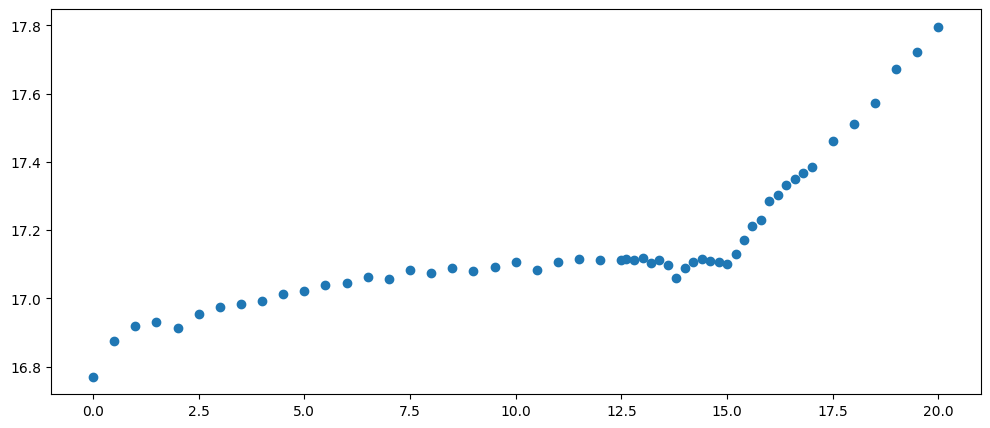

In [12]:
sigma_prime=conductance*((100+V_titrage)/100)
fig=plt.figure(figsize=[12,5])
plt.scatter(V_titrage,sigma_prime)
plt.show()